# PCA
The PCA class in sklearn.decomposition is used for Principal Component Analysis, which is a method for linear dimensionality reduction. It works by using Singular Value Decomposition (SVD) to project the data into a lower-dimensional space while retaining most of the variance from the original dataset.

### Key Components:
- Dimensionality Reduction: PCA reduces the dimensions of data while preserving the directions that capture the most variance. This is particularly useful for high-dimensional datasets.
- SVD and Eigenvectors: PCA uses SVD to compute the eigenvectors of the covariance matrix. The eigenvectors represent the directions of maximum variance (principal components).
- Explained Variance: Each component explains a percentage of the variance in the dataset. The sum of the explained variances of all components equals 100% of the data’s variance.

class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)

In [1]:
import numpy as np

In [10]:
class PCA:
    def __init__(self,n_components):
        self.n_components=n_components
        self.mean=None
        
    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        cov=np.cov(X.T)
        eigenvectors,eigenvalues=np.linalg.eig(cov)
        eigenvectors=eigenvectors.T
        idxs=np.argsort(eigenvalues)[::-1]
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]
        self.components=eigenvectors[:self.n_components]

    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.components.T)

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets
data=datasets.load_iris()
X=data.data
y=data.target

In [12]:
pca=PCA(2)
pca.fit(X)
transform=pca.transform(X)

In [14]:
transform[:5]

array([[ 1.4830792 , -4.78073718],
       [-0.6795758 , -4.82460895],
       [ 0.10971744, -4.83800114],
       [-0.3217319 , -4.79967145],
       [ 1.8816363 , -4.77529974]])

In [15]:
x1=transform[:,0]
x2=transform[:,1]

C:\Users\gyanb\AppData\Local\Temp\ipykernel_6676\628054209.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap("viridis",3))


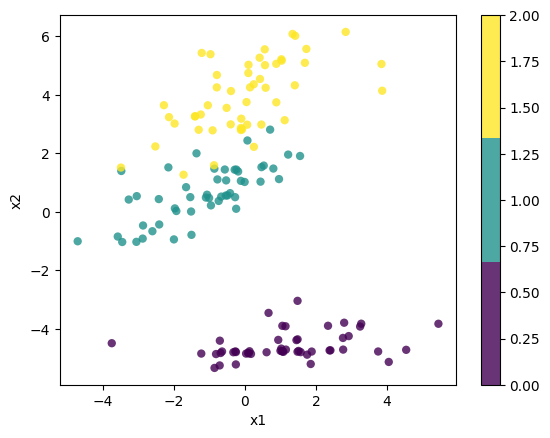

In [17]:
plt.scatter(x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap("viridis",3))
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
plt.show()

### Parameters:
- n_components: Specifies how many principal components to keep. If not set, all components are kept.<br>
If a value between 0 and 1 is set, the number of components is determined by the variance ratio that needs to be explained.<br>
Using 'mle' will apply Minka's MLE method to estimate the number of components.
- svd_solver:<br>
"auto": Chooses a solver depending on the dataset size and structure.<br>
"full": Computes the exact SVD.<br>
"randomized": Faster method for large datasets, approximating the SVD.<br>
"arpack": Uses ARPACK for sparse input.<br>
"covariance_eigh": Runs classical eigenvalue decomposition.
- whiten: If True, the components are scaled to have unit variance, which may improve performance in some downstream algorithms.
- tol: Tolerance for singular values used by the arpack solver.
- iterated_power: Number of iterations for the power method used by the randomized solver.
- random_state: Set to ensure reproducibility when using randomized or arpack solvers.

### Attributes:
- components_: Principal axes (or eigenvectors) of the data in the transformed space.
- explained_variance_: Variance explained by each component.
- explained_variance_ratio_: Ratio of variance explained by each component.
- singular_values_: Singular values corresponding to each component.
- mean_: Empirical mean of the data.
- noise_variance_: Noise covariance estimated for Probabilistic PCA.

### Key Methods:
- fit(X): Fits the PCA model to the input data X.
- fit_transform(X): Combines fitting the model and transforming the input data in one step.
- inverse_transform(X): Reconstructs the original data from the reduced dimensionality space.
- score(X): Returns the average log-likelihood of the samples.
- get_covariance(): Estimates the covariance matrix from the data.

C:\Users\gyanb\AppData\Local\Temp\ipykernel_6676\2610887887.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap("viridis",3))


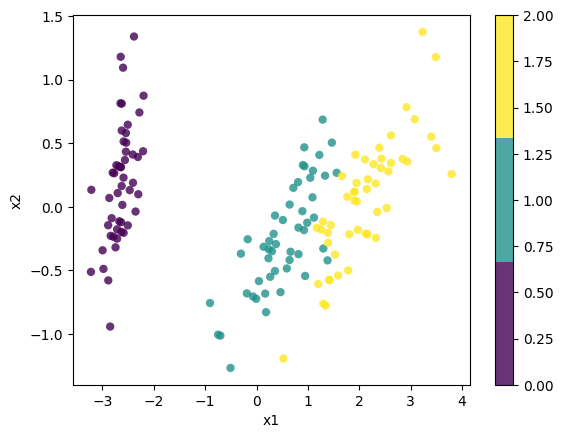

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
transform=pca.transform(X)
x1=transform[:,0]
x2=transform[:,1]
plt.scatter(x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap("viridis",3))
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
plt.show()

### Example:
- import numpy as np<br>
from sklearn.decomposition import PCA

- Sample data<br>
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

- Apply PCA with 2 components<br>
pca = PCA(n_components=2)<br>
pca.fit(X)

- Explained variance ratio<br>
print(pca.explained_variance_ratio_)
- Singular values<br>
print(pca.singular_values_)

- This snippet applies PCA to a sample dataset and shows the explained variance ratio and singular values for the principal components.

- PCA is widely used in machine learning for dimensionality reduction, noise reduction, and to improve algorithm efficiency by working in a transformed lower-dimensional space.